In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.parse
# import re

data_raw = pd.read_csv('data/raw/output.csv')
data = data_raw.copy()


# Drop duplicates based on columns
data = data.drop_duplicates(subset=[
    # "Property ID",
    "External reference",
    "Address",
    "Reference number of the EPC report"
])

# Drop specific columns
data = data.drop(columns=["Url", "External reference", "Property ID", "Type of sale", "Address", "Tenement building", "Swimming pool"])

# Dropping order is important:
data = data.dropna(axis=1, thresh=data.shape[0] * 0.7) # Drop columns first
data = data.dropna(axis=0, thresh=data.shape[1] * 1.0) # Drop rows



# Rename specific columns, clean some text values
data.rename(columns={"How many fireplaces?": "Fireplace"}, inplace=True)

data['Locality name'] = data['Locality name'].apply(urllib.parse.unquote)

data["Price"] = data["Price"].str.replace("€", "")
try:
    data["Price"] = data["Price"].str.replace("Starting price : ", "")
    data["Price"] = data["Price"].astype(int)
except:
    data = data[~data["Price"].str.contains(r'\d+\s+per\s+month')]
    data["Price"] = data["Price"].str.replace(r'\D', '').astype(int)



# Creating price categories
bins = pd.cut(
    x = data["Price"],
    bins=[0, 100000, 500000, 1000000, data["Price"].max()+1],
    labels=["low", "medium", "high", "exorbitant"]
)
data["Price bins"] = bins


# Value remapping
energy_class_mapping = {
    "G": 0,
    "F": 1,
    "F_C": 1,
    "E": 2,
    "D": 3,
    "C": 4,
    "B": 5,
    "A": 6,
    "A+": 7,
    "A++": 8,
    "A+++": 9,
}

data["Energy class"] = data["Energy class"].map(energy_class_mapping)



# Display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)



C:\Users\Huraqan\AppData\Local\Temp\ipykernel_5632\1685147510.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('data/raw/output.csv')


# We have 40 attributes but we're keeping only 15:

In [2]:

print("Data raw shape:", data_raw.shape)
print("Data cleaned shape:", data.shape)

total_rows = len(data_raw)
series = data_raw.isna().sum()
series = series.sort_values(ascending=True)
percentage_series = (series / total_rows) * 100
display(percentage_series)


Data raw shape: (18095, 40)
Data cleaned shape: (6857, 17)


Url                                            0.00
How many fireplaces?                           0.00
Furnished                                      0.00
Kitchen type                                   0.00
Type of sale                                   0.00
Subtype of property                            0.00
Swimming pool                                  0.00
Price                                          0.00
Postal code                                    0.00
Locality name                                  0.00
Property ID                                    0.00
Type of property                               0.00
Tenement building                              1.23
Bedrooms                                       2.75
Address                                        3.77
Living area                                    8.24
Bathrooms                                     10.47
External reference                            10.84
Energy class                                  19.05
Number of fr

# KEEPING ONLY:
'Locality name', 'Postal code', 'Price', 'Type of property', 'Subtype of property', 'Bedrooms', 'Living area', 'Kitchen type', 'Furnished', 'Fireplace', 'Energy class', 'Price bins' 
because we find them most reliable

In [ ]:
data

,Locality name,Postal code,Price,Type of property,Subtype of property,Bedrooms,Living area,Kitchen type,Furnished,Fireplace,...,Primary energy consumption,Energy class,Reference number of the EPC report,CO₂ emission,Yearly theoretical total energy consumption,Subdivision permit,Possible priority purchase right,Flood zone type,Latest land use designation,Price bins
0,vielsalm,6690,244000,house,house,3.00,104.00,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,Non flood zone,"Living area (residential, urban or rural)",medium
1,lebbeke,9280,699000,house,house,6.00,NaN,1,0,0,...,238.00,4.00,20231201-0003051650-RES-2,NaN,NaN,0.00,0.00,Non flood zone,"Living area (residential, urban or rural)",high
2,hamme,9220,290000,house,house,4.00,151.00,1,0,0,...,631.00,1.00,20230303_0002822017_RES_2,NaN,NaN,0.00,0.00,Non flood zone,"Living area (residential, urban or rural)",medium
3,gent,9000,670000,apartment,kot,7.00,285.00,1,0,0,...,159.00,5.00,20210410-0002393666-RES-1,NaN,NaN,0.00,0.00,Non flood zone,NaN,high
4,westende,8434,148000,apartment,flat-studio,NaN,34.00,1,1,0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,Non flood zone,NaN,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18089,lier,2500,990000,house,house,9.00,617.00,1,0,0,...,NaN,NaN,20231031-0010691368-NR-1,NaN,NaN,0.00,1.00,Non flood zone,"Living area (residential, urban or rural)",high
18091,lier,2500,375000,house,house,4.00,251.00,1,0,0,...,383.00,3.00,20190718-0002178963-RES-2,NaN,NaN,0.00,0.00,Non flood zone,"Living area (residential, urban or rural)",medium
18092,lier,2500,249000,house,house,1.00,63.00,1,0,0,...,421.00,2.00,NaN,NaN,NaN,0.00,0.00,Non flood zone,Extended residential area,medium
18093,lier,2500,275000,house,house,3.00,146.00,1,0,0,...,320.00,3.00,20211210-0002507558-RES-1,NaN,NaN,0.00,0.00,Non flood zone,"Living area (residential, urban or rural)",medium


# There are 10 numeric fields and 5 string types:

In [9]:

numerical_cols : list = data.select_dtypes(include=["float", "int"]).columns
print("stuff: ", numerical_cols)
print("stuff: ", type(numerical_cols))
numerical_data = pd.DataFrame()
numerical_data[numerical_cols] = data[numerical_cols]
# numerical_data.drop(columns=[
#     "Kitchen type",
#     "Furnished", "Fireplace", "Bedroom 1 surface",
#     "Bedroom 2 surface", "Bedroom 3 surface",
#     "Subdivision permit", "Possible priority purchase right",
#     "Number of floors", "Construction year"
#     ], inplace=True)
print(f"Numerical fields only: {numerical_data.shape}\n")
print(numerical_data.dtypes)

stuff:  Index(['Price', 'Bedrooms', 'Living area', 'Kitchen type', 'Furnished',
       'Fireplace', 'Number of frontages', 'Bathrooms', 'Toilets',
       'Primary energy consumption', 'Energy class'],
      dtype='object')
stuff:  <class 'pandas.core.indexes.base.Index'>
Numerical fields only: (6857, 11)

Price                           int32
Bedrooms                      float64
Living area                   float64
Kitchen type                    int64
Furnished                       int64
Fireplace                       int64
Number of frontages           float64
Bathrooms                     float64
Toilets                       float64
Primary energy consumption    float64
Energy class                    int64
dtype: object


# Many outliers but the worst ones are:
Bedrooms, bathrooms, primary energy consumption and even the price.

Castles are rare yet they skew the data analysis quite a bit.

# IQR for handling outliers

In [4]:

# IQR Outlier deletion
print("Old Shape: ", numerical_data.shape)

numerical_data_IQR = numerical_data.copy()

# for column in numerical_data.columns:
for column in [
    # "Price",
    "Primary energy consumption",
    "Bedrooms",
    "Living area",
    "Bathrooms",
    "Number of frontages",
    "Energy class",
    ]:
    previous_count = numerical_data_IQR.shape[0]
    
    # IQR
    # Calculate the upper and lower limits
    Q1 = numerical_data_IQR[column].quantile(0.15)
    Q3 = numerical_data_IQR[column].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(numerical_data_IQR[column] >= upper)[0]
    lower_array = np.where(numerical_data_IQR[column] <= lower)[0]
    full_array = np.concatenate((upper_array, lower_array))
    
    # Removing the outliers
    numerical_data_IQR = numerical_data_IQR.drop(index=numerical_data_IQR.index[upper_array])

    print(f"\nRows removed from {column}:", previous_count - numerical_data_IQR.shape[0])
    print("upper outliers:", len(upper_array))
    # print("lower outliers:", len(lower_array))
    # print("lower values:", numerical_data_IQR[column].iloc[lower_array])

print("\nNew Shape: ", numerical_data_IQR.shape)

Old Shape:  (6857, 11)

Rows removed from Primary energy consumption: 8
upper outliers: 8

Rows removed from Bedrooms: 34
upper outliers: 34

Rows removed from Living area: 30
upper outliers: 30

Rows removed from Bathrooms: 7
upper outliers: 7

Rows removed from Number of frontages: 1
upper outliers: 1

Rows removed from Energy class: 0
upper outliers: 0

New Shape:  (6777, 11)


# How do these fields correlate?

### Numerical data without IQR

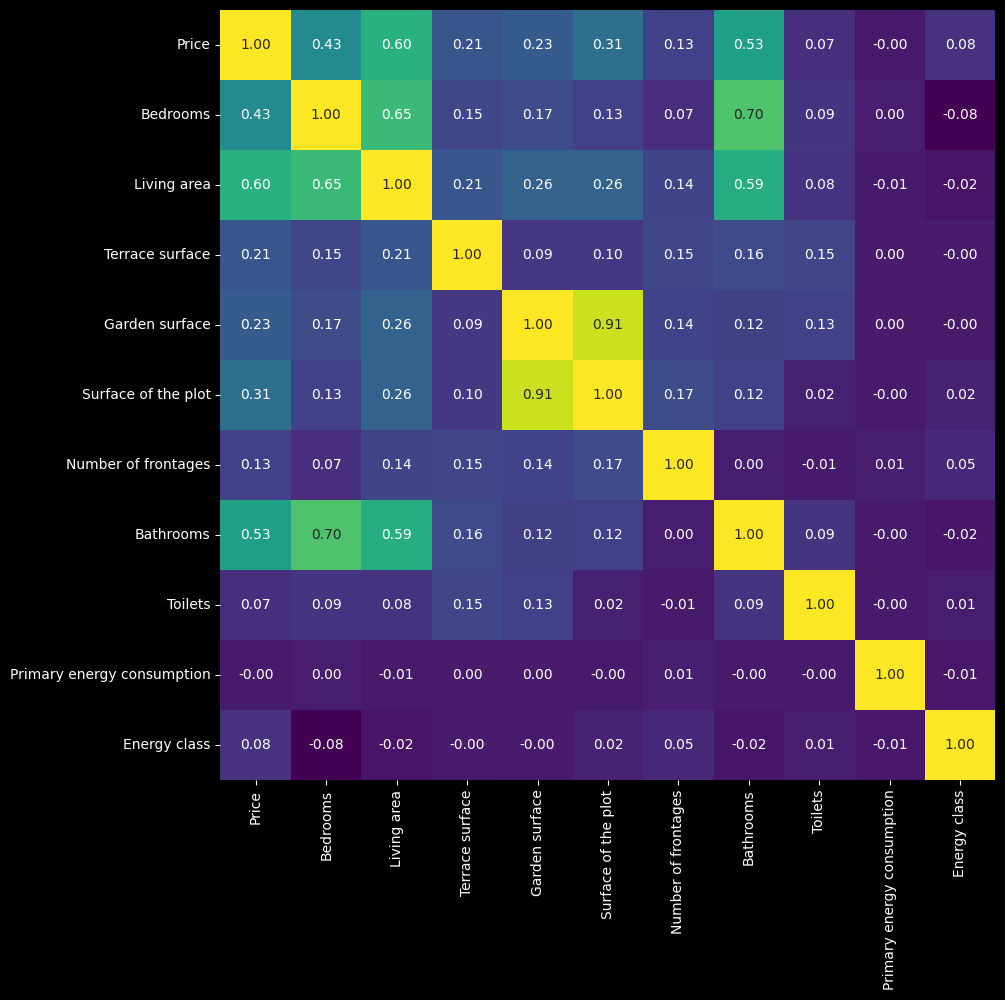

In [20]:
plt.style.use("dark_background")
plt.figure(figsize=(10, 10))
sns.heatmap(numerical_data.corr(), annot=True, cbar=False, cmap="viridis", fmt=".2f")
plt.show()

### Numerical data with IQR

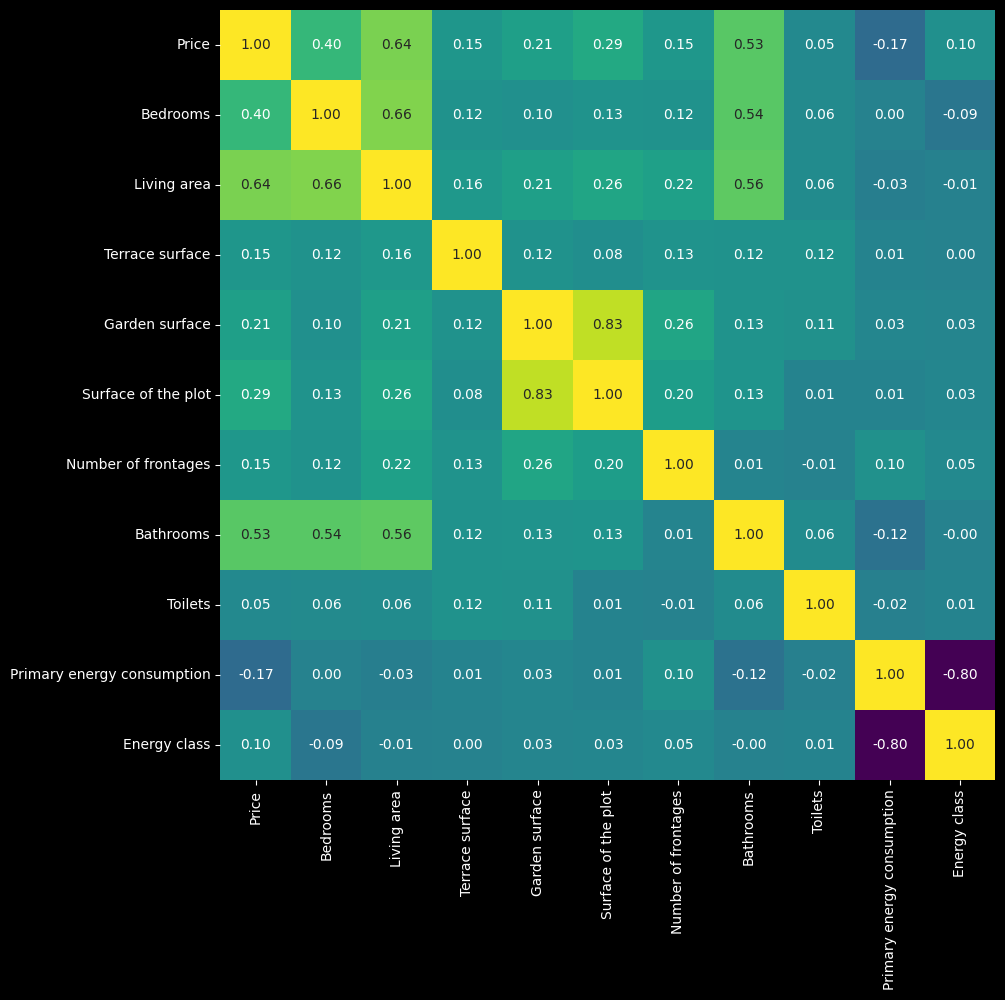

In [22]:
plt.style.use("dark_background")

plt.figure(figsize=(10, 10))
map = sns.heatmap(numerical_data_IQR.corr(), annot=True, cbar=False, cmap="viridis", fmt=".2f")


# cbar = map.collections[0].colorbar
# cbar.set_label('Correlation', color='blue')  # Change 'blue' to any other color you prefer
# cbar.ax.yaxis.set_tick_params(color='red')

plt.show()

# Provinces

In [ ]:
data_provinces = data.copy()

provinces = {
    "Antwerp": "2000-2999",
    "Brussels": "1000-1299",
    "East Flanders": "9000-9999",
    "Flemish Brabant": ["1500-1999", "3000-3499"],
    "Hainaut": ["6000-6599", "7000-7999"],
    "Liege": "4000-4999",
    "Limburg": "3500-3999",
    "Luxembourg": "6600-6900",
    "Namur": "5000-5999",
    "Walloon Brabant": "1300-1499",
    "West Flanders": "8000-8999"
}
for index, postal_code in data_provinces["Postal code"].items():
    for province, postal_range in provinces.items():
        if isinstance(postal_range, list):
            for range_str in postal_range:
                range_start, range_end = map(int, range_str.split("-"))
                if postal_code in range(range_start, range_end + 1):
                    data_provinces.loc[index, "Provinces"] = province
        else:
            range_start, range_end = map(int, postal_range.split("-"))
            if postal_code in range(range_start, range_end + 1):
                data_provinces.loc[index, "Provinces"] = province


# Calculate the average price per locality
# Assuming data_provinces contains the necessary columns like 'Provinces', 'Price', etc.

# Calculate the average price per locality
localities = data_provinces.groupby('Provinces')
average_price_per_locality = localities['Price'].mean()

# Create a DataFrame to display the results
average_price = pd.DataFrame({'Province': average_price_per_locality.index, 'Average price': average_price_per_locality.values})
average_price.head(10)



# Calculate the average price per locality
localities = data.groupby("Province")
average_price_per_locality = localities["Price"].mean()

# Create a DataFrame to display the results
average_price = pd.DataFrame({"Province": average_price_per_locality.index, "Average price": average_price_per_locality.values})
average_price.head(10)

display(data)


How are the number of properties distributed according to their surface?


In [ ]:
plt.figure(figsize=(10, 6), constrained_layout=True)


sns.pointplot(data=average_price, x="Province", y="Average price")
plt.xlabel("Province")
plt.ylabel("Average price per Province")
plt.title("Distribution of Prices by Locality Postal Code")

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

In [ ]:
# NOT FINISHED !!!!!!!!!!


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique investment types
investment_types = data['Price bins'].unique()

# Create subplots and figure
fig, axes = plt.subplots(len(investment_types), 1, figsize=(10, 10))

# Iterate over investment types
for i, investment_type in enumerate(investment_types):
    df_filtered = data[data['Price bins'] == investment_type]  # Filter data

    sns.histplot(
        data=df_filtered,
        x="Price",
        hue="Postal code",
        kde=True,
        common_bins=True,
        ax=axes[i]
    )

    # Subplot titles
    axes[i].set_title(investment_type)

# Shared title for all subplots
plt.suptitle("Price Distribution by Investment Type and Region")

# Adjust spacing and show
plt.tight_layout()
plt.show()


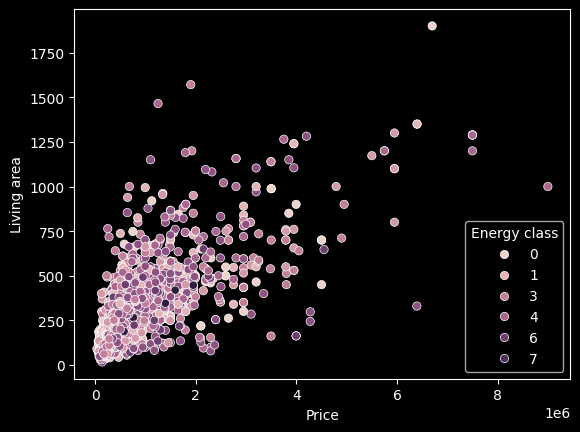

In [3]:
plt.style.use("dark_background")

sns.scatterplot(data=data, x="Price", y="Living area", hue="Energy class")
plt.savefig("fig.png", transparent = True, dpi=300)